In [7]:
import os
for dirname,_,filenames in os.walk("./data"):
    for filename in filenames:
        print(os.path.join(dirname,filename));


./data\personality_dataset.csv
./data\sample_submission.csv
./data\test.csv
./data\train.csv


In [8]:
import pandas as pd
import numpy as np
import warnings

import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [19]:
df = pd.read_csv('./data/train.csv')

In [20]:
df

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert
...,...,...,...,...,...,...,...,...,...
18519,18519,3.0,No,7.0,3.0,No,9.0,7.0,Extrovert
18520,18520,1.0,NaN,6.0,7.0,No,6.0,5.0,Extrovert
18521,18521,7.0,Yes,1.0,1.0,Yes,1.0,NaN,Introvert
18522,18522,NaN,Yes,1.0,0.0,Yes,5.0,2.0,Introvert


In [24]:
df.shape

(18524, 9)

In [29]:
df.describe()

,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,18524.000000,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,9261.500000,3.137764,5.265106,4.044319,7.996737,4.982097
std,5347.562529,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4630.750000,1.000000,3.000000,3.000000,5.000000,3.000000
50%,9261.500000,2.000000,5.000000,4.000000,8.000000,5.000000
75%,13892.250000,4.000000,8.000000,6.000000,12.000000,7.000000
max,18523.000000,11.000000,10.000000,7.000000,15.000000,10.000000


<Axes: xlabel='Going_outside'>

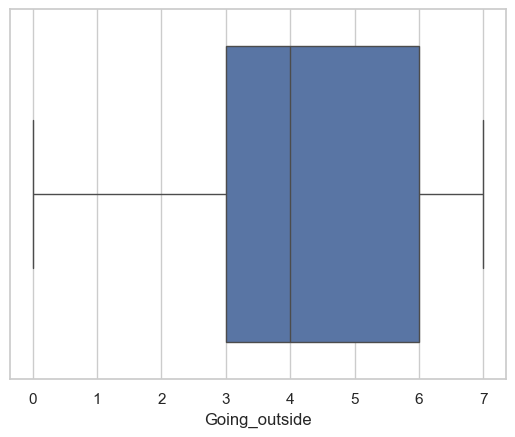

In [35]:
# sns.boxplot(x=df['Time_spent_Alone'])
sns.boxplot(x=df['Going_outside'])

<Axes: xlabel='Time_spent_Alone', ylabel='Count'>

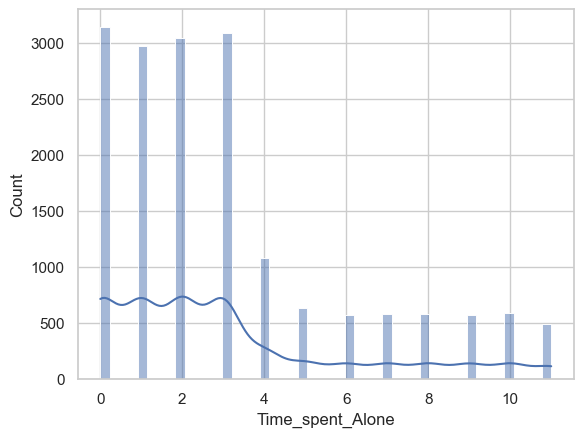

In [42]:
sns.histplot(df['Time_spent_Alone'],kde=True)
# sns.histplot(df['Going_outside'])

In [25]:
df.isna().sum()

id                              0
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [43]:
df_cleaned = df.dropna()

In [45]:
df_cleaned.shape

(10189, 9)

In [46]:
print(f"Original number of rows: {len(df)}")
print(f"Number of rows after dropping nulls: {len(df_cleaned)}")

Original number of rows: 18524
Number of rows after dropping nulls: 10189


In [47]:

train = pd.read_csv("./data/train.csv")
test  = pd.read_csv("./data/test.csv")

train['dataset'] = 'train'
test['dataset'] = 'test'

df_combined = pd.concat([train, test], axis=0).reset_index(drop=True)

print("Dataset shape:", df.shape)

df_combined.head()

Dataset shape: (18524, 9)


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,dataset
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert,train
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert,train
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert,train
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert,train
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert,train


In [48]:
df_combined.shape

(24699, 10)

In [49]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24699 entries, 0 to 24698
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         24699 non-null  int64  
 1   Time_spent_Alone           23084 non-null  float64
 2   Stage_fear                 22208 non-null  object 
 3   Social_event_attendance    23122 non-null  float64
 4   Going_outside              22767 non-null  float64
 5   Drained_after_socializing  23118 non-null  object 
 6   Friends_circle_size        23295 non-null  float64
 7   Post_frequency             23027 non-null  float64
 8   Personality                18524 non-null  object 
 9   dataset                    24699 non-null  object 
dtypes: float64(5), int64(1), object(4)
memory usage: 1.9+ MB


In [63]:
numerical_cols = df_combined.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = df_combined.select_dtypes(include=['object', 'bool']).columns.tolist()

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['id', 'Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
Categorical Columns: ['Stage_fear', 'Drained_after_socializing', 'Personality', 'dataset']


In [65]:
missing_values=df_combined.isna().sum()
missing_percentage=(missing_values/len(df_combined))*100
missing_df = pd.DataFrame({"missing_values":missing_values,"missing_percentage":missing_percentage})
missing_df

,missing_values,missing_percentage
id,0,0.000000
Time_spent_Alone,1615,6.538726
Stage_fear,2491,10.085429
Social_event_attendance,1577,6.384874
Going_outside,1932,7.822179
Drained_after_socializing,1581,6.401069
Friends_circle_size,1404,5.684441
Post_frequency,1672,6.769505
Personality,6175,25.001012
dataset,0,0.000000


In [66]:
df_combined[numerical_cols].describe()

,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,24699.000000,23084.000000,23122.000000,22767.000000,23295.000000,23027.000000
mean,12349.000000,3.132559,5.270824,4.042693,7.999657,4.993833
std,7130.131485,2.999230,2.754491,2.058194,4.215721,2.876184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6174.500000,1.000000,3.000000,3.000000,5.000000,3.000000
50%,12349.000000,2.000000,5.000000,4.000000,8.000000,5.000000
75%,18523.500000,4.000000,8.000000,6.000000,12.000000,7.000000
max,24698.000000,11.000000,10.000000,7.000000,15.000000,10.000000


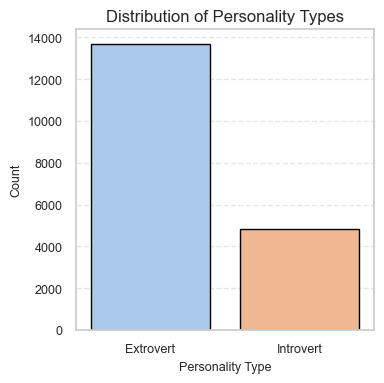

In [89]:
plt.figure(figsize=(4, 4))
sns.countplot(data=df, x='Personality', palette='pastel', edgecolor='black')

plt.title('Distribution of Personality Types', fontsize=12)
plt.xlabel('Personality Type', fontsize=9)
plt.ylabel('Count', fontsize=9)

plt.tick_params(axis='x', labelsize=9)
plt.tick_params(axis='y', labelsize=9)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()